# Kmeans Clustering
## Cluster lable를 구하면 기존 변수와 상관관계가 높아지게 되어 예측성능이 저하되기에 
## Cluset transform(거리)를 구해 (만약 cluster가 n개이면, 기존변수는 모두 버리고 n개의 변수(거리)로 예측)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 표시
plt.rcParams['axes.unicode_minus'] = False  #한글 폰트 사용시 마이너스 폰트 깨짐 해

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
lgr = LogisticRegression(random_state=0)
lgr.fit(X_train, y_train).score(X_test, y_test)

0.9300699300699301

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=17)
X_clusters = kmeans.fit_predict(X_train).reshape(-1, 1)
pd.DataFrame(X_clusters, columns=['클러스터']).head()
lgr.fit(np.hstack([X_train, X_clusters]), y_train)
lgr.score(np.hstack([X_test, kmeans.predict(X_test).reshape(-1, 1)]), y_test)

,클러스터
0,0
1,0
2,1
3,0
4,0


LogisticRegression(random_state=0)

0.9440559440559441

In [4]:
X_clusters_distance = kmeans.fit_transform(X_train)
distance = ['군집1_거리', '군집2_거리', '군집3_거리']
pd.DataFrame(X_clusters_distance, columns=distance).head()
lgr.fit(np.hstack([X_train, X_clusters_distance]), y_train)
lgr.score(np.hstack([X_test, kmeans.transform(X_test)]), y_test)

,군집1_거리,군집2_거리,군집3_거리
0,460.810456,1492.436826,2856.187554
1,246.126672,788.934356,2155.525148
2,1193.675364,360.824967,1275.165189
3,177.948433,1211.961091,2578.850344
4,69.661908,1102.790002,2470.238122


LogisticRegression(random_state=0)

0.951048951048951

아마도 원래 데이터와 소속 군집의 무게중심과의 거리는 상관관계가 있다

In [5]:
X_train

array([[8.219e+00, 2.070e+01, 5.327e+01, ..., 7.879e-02, 3.322e-01,
        1.486e-01],
       [1.396e+01, 1.705e+01, 9.143e+01, ..., 1.374e-01, 3.068e-01,
        7.957e-02],
       [1.550e+01, 2.108e+01, 1.029e+02, ..., 2.134e-01, 3.003e-01,
        1.048e-01],
       ...,
       [1.026e+01, 1.222e+01, 6.575e+01, ..., 6.696e-02, 2.937e-01,
        7.722e-02],
       [1.290e+01, 1.592e+01, 8.374e+01, ..., 1.012e-01, 3.549e-01,
        8.118e-02],
       [1.242e+01, 1.504e+01, 7.861e+01, ..., 4.052e-02, 2.901e-01,
        6.783e-02]])

In [6]:
col_names = load_breast_cancer()['feature_names'].tolist() + distance
data = pd.DataFrame(np.hstack([X_train, X_clusters_distance]), columns=col_names)
data.iloc[:, 25:].head()

,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,군집1_거리,군집2_거리,군집3_거리
0,0.43100,0.538100,0.07879,0.3322,0.14860,460.810456,1492.436826,2856.187554
1,0.32620,0.320900,0.13740,0.3068,0.07957,246.126672,788.934356,2155.525148
2,0.40020,0.421100,0.21340,0.3003,0.10480,1193.675364,360.824967,1275.165189
3,0.07348,0.004955,0.01111,0.2758,0.06386,177.948433,1211.961091,2578.850344
4,0.08862,0.114500,0.07431,0.2694,0.06878,69.661908,1102.790002,2470.238122


<AxesSubplot:>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5]),
 [Text(0.5, 0, 'mean radius'),
  Text(1.5, 0, 'mean texture'),
  Text(2.5, 0, 'mean perimeter'),
  Text(3.5, 0, 'mean area'),
  Text(4.5, 0, 'mean smoothness'),
  Text(5.5, 0, 'mean compactness'),
  Text(6.5, 0, 'mean concavity'),
  Text(7.5, 0, 'mean concave points'),
  Text(8.5, 0, 'mean symmetry'),
  Text(9.5, 0, 'mean fractal dimension'),
  Text(10.5, 0, 'radius error'),
  Text(11.5, 0, 'texture error'),
  Text(12.5, 0, 'perimeter error'),
  Text(13.5, 0, 'area error'),
  Text(14.5, 0, 'smoothness error'),
  Text(15.5, 0, 'compactness error'),
  Text(16.5, 0, 'concavity error'),
  Text(17.5, 0, 'concave points error'),
  Text(18.5, 0, 'symmetry error'),
  Text(19.5, 0, 'fractal dimension error'),
  Text(20.5, 0, 'worst radius'),
  Text(21.5, 0, 'worst texture'),

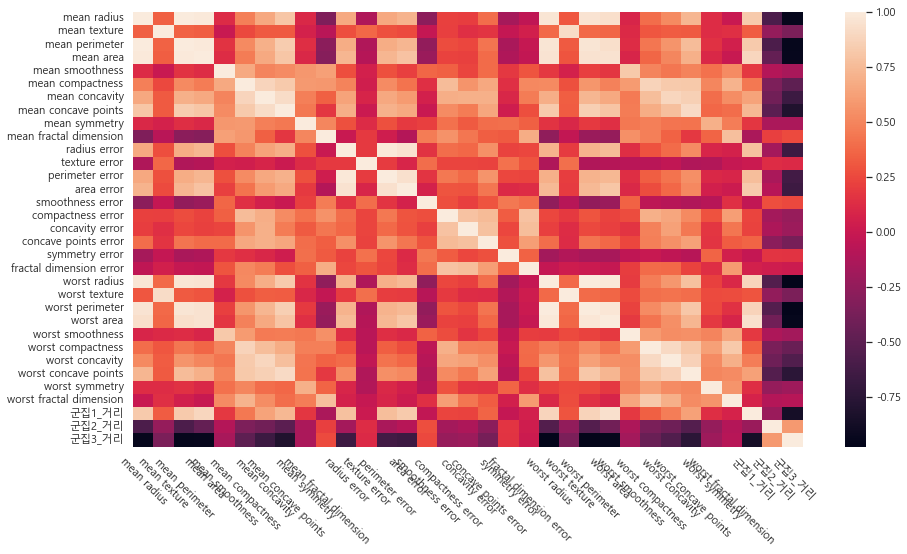

In [7]:
sns.set(rc = {'figure.figsize':(15,8)})
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 표시
sns.heatmap(data.corr())
plt.xticks(rotation=-45)

Given that our new features are indeed correlated with some of the existing ones, what if we use only the distances to the cluster means as features, will it work then?

In [8]:
kmeans = KMeans(n_clusters=3, random_state=17)
X_clusters = kmeans.fit_transform(X_train)
pd.DataFrame(X_clusters).head()
lgr.fit(X_clusters, y_train)
lgr.score(kmeans.transform(X_test), y_test)

,0,1,2
0,460.810456,1492.436826,2856.187554
1,246.126672,788.934356,2155.525148
2,1193.675364,360.824967,1275.165189
3,177.948433,1211.961091,2578.850344
4,69.661908,1102.790002,2470.238122


LogisticRegression(random_state=0)

0.951048951048951

Much better. With this example, you can see that we can use K-Means as a way to do dimensionality reduction. Neat.

# End